Iris data setini kullanarak iris çiçeğinin türlerini tahmin edelim.
1-Data kütüphanelerini yükleyelim

In [21]:
import numpy as np
import pandas as pd

2-Datayı yükleyelim.

In [23]:
data = pd.read_csv(r"C:\Users\cagla\Desktop\flower\iris.csv")

In [24]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Hedefimiz çiçeklerin alt ve üst yaprak genişlik ve uzunluklarına göre türlerini tahmin etmek
3-Datasetimiz NaN value içeriyor mu kontrol edelim

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


5-Görselleştirme kütüphanelerini yükleyelim.

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

 6-Görselleştirmeye başlıyalım

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'SepalLengthCm'}>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}>,
        <AxesSubplot:title={'center':'PetalLengthCm'}>],
       [<AxesSubplot:title={'center':'PetalWidthCm'}>, <AxesSubplot:>]],
      dtype=object)

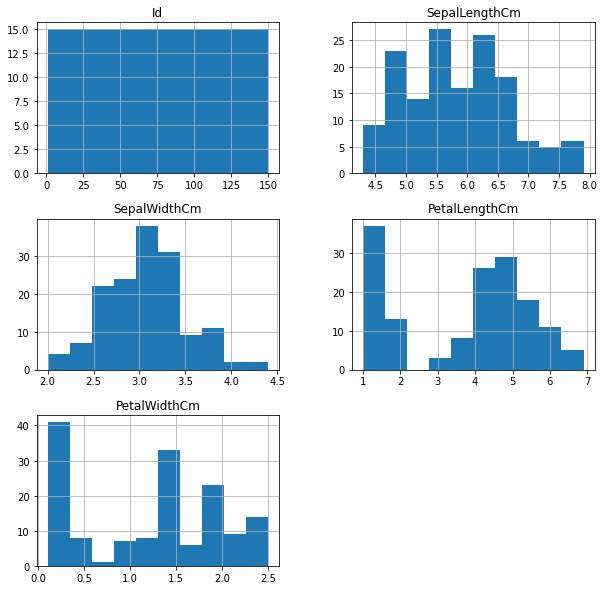

In [30]:
data.hist(figsize=(10,10))

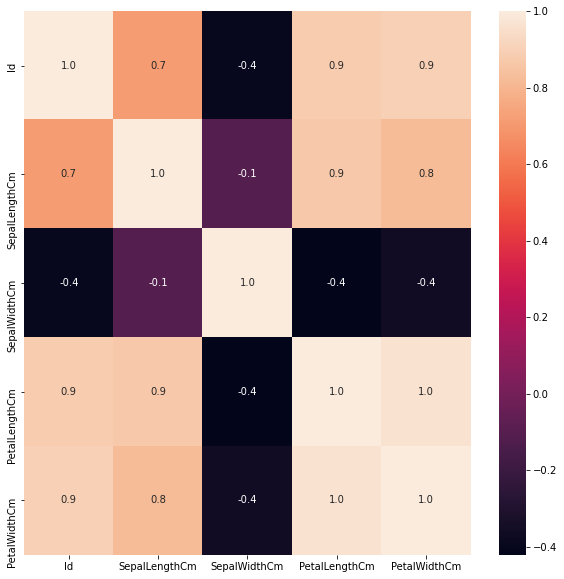

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

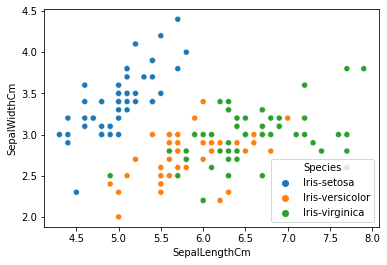

In [32]:
sns.scatterplot(x = "SepalLengthCm" , y = "SepalWidthCm" , hue = "Species" , data = data)

7- Artık tahmin aşamasına geçebiliriz.
Train test spliti yükleyelim.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X  = data.drop(['Id', 'Species'], axis = 1)
y = data['Species']

In [36]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

8-Kullanıcağımız modeli yükleyelim.

In [39]:
from sklearn.svm import SVC

9- Eğitelim bakalım

In [40]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [41]:
y_pred = svc.predict(X_test)

In [60]:
#confusion matrixe bir daha bakalım
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 17  0]
 [ 0  1 10]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



<AxesSubplot:>

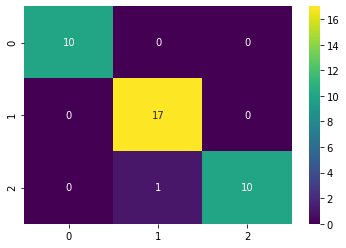

In [61]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'viridis', annot = True)

In [45]:
from sklearn.metrics import accuracy_score

In [48]:
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_svc

100.0

 10-Başka algoritmalarla da deniyelim.

In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

100.0


In [52]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

97.37


In [53]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_sgd)

97.37


In [55]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_knn)

100.0


In [57]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

97.37


In [58]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_decisiontree)

97.37


In [59]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines','Logistic Regression', 'Gradient Boosting Classifier',
             'Stochastic Gradient Descent', 'KNN','Random Forest','Decision Tree'],
    'Score': [acc_svc,acc_logreg, acc_gbk, acc_sgd,acc_knn, acc_randomforest, acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,100.00
1,Logistic Regression,100.00
4,KNN,100.00
2,Gradient Boosting Classifier,97.37
3,Stochastic Gradient Descent,97.37
5,Random Forest,97.37
6,Decision Tree,97.37
